In [180]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
def maping(x):
    return x*5 + 9

In [3]:
X = []
Y = []

In [4]:
for _ in range(100):
    x = np.random.randn(2,)
    y = sum(list(map(maping, x)))
    X.append(x)
    Y.append(y)

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
X.shape

(100, 2)

In [181]:
class Dense_layer:

    def __init__(self, n_neurons):
        # self.input = input
        self.has_initialized = False
        self.n_neurons = n_neurons
        # self.weights = np.random.randn(n_neurons,input.shape[1])
        # self.bias = np.random.randn()

    def forward_propagation(self, input):
        if not self.has_initialized:
            self.weights = np.random.randn(self.n_neurons,input.shape[1])
            self.bias = np.random.randn()
            self.has_initialized = True
        self.input = input
        self.output = (np.dot(self.weights, input.T) + self.bias).T

    def backward_propagation(self, dvalues):
        self.dweights = dvalues.T.dot(self.input)
        self.dinputs = dvalues.dot(self.weights)
    
    def update(self):
        # print(self.weights)
        # print(self.dweights)
        self.weights += (self.dweights*(-0.001))
        # print(self.weights)
        # return dvalues.T.dot(self.input)

In [182]:
class MeanSquaredLoss:

    def __init__(self, y):
        self.y = y
    
    def forward_propagation(self, input_val):
        self.loss = np.sqrt(((input_val-self.y)**2).sum()/len(self.y))
        self.input = input_val
        print(f'Current Loss: {self.loss}')

    def backward_propagation(self):
        self.dinputs = -2*(self.y-self.input)/len(self.y)
        self.dinputs = self.dinputs.reshape((self.dinputs.shape[0],1))
        # print(self.dinputs)

In [183]:
class Relu_layer:

    def forward_propagation(self,input):
        input = input.copy()
        input[input<0] = 0
        self.output = input
    
    def backward_propagation(self, input):
        input = input.copy()
        input[input<0] = 0
        input[input>0] = 1
        self.dinputs = input

    def update(self):
        pass

In [186]:
class Sequential:

    def __init__(self, layers):
        self.layers = layers
        self.layers_rev = layers[::-1]

    def fit(self, x, y, no_of_epochs):
        # self.__initialize(x,y)
        history = dict({
            'loss':[]
        })
        for _ in range(no_of_epochs):

            for idx, layer in enumerate(self.layers):
                if idx==0:
                    layer.forward_propagation(x)
                else:
                    layer.forward_propagation(self.layers[idx-1].output)

            for idx, layer in enumerate(self.layers_rev):
                if idx==0:
                    history['loss'].append(layer.loss)
                    layer.backward_propagation()
                else:
                    layer.backward_propagation(self.layers_rev[idx-1].dinputs)
                    layer.update()
            
        return history
                    # print(layer.weights)

    # def __initialize(self, x, y):
    #     for idx, layer in enumerate(self.layers):
    #         if idx==0:
    #             layer


In [187]:
Y = Y.reshape((Y.shape[0], 1))

In [188]:
model = Sequential([
    Dense_layer(4),
    Dense_layer(1),
    MeanSquaredLoss(Y)
])


In [189]:
history = model.fit(X,Y, 200)

Current Loss: 23.43367791111175
Current Loss: 22.79492082705913
Current Loss: 22.177428289405572
Current Loss: 21.579843678154187
Current Loss: 21.000958557491593
Current Loss: 20.43968889247639
Current Loss: 19.895056262077755
Current Loss: 19.366172936709336
Current Loss: 18.852229961940782
Current Loss: 18.352487590812512
Current Loss: 17.866267556030753
Current Loss: 17.39294678484676
Current Loss: 16.931952243884748
Current Loss: 16.48275666586469
Current Loss: 16.044874960290166
Current Loss: 15.617861149502325
Current Loss: 15.20130570277042
Current Loss: 14.794833166285628
Current Loss: 14.398100007500739
Current Loss: 14.010792609275835
Current Loss: 13.632625363524877
Current Loss: 13.263338826076732
Current Loss: 12.902697904678037
Current Loss: 12.550490060773459
Current Loss: 12.206523513117759
Current Loss: 11.870625437561264
Current Loss: 11.542640162621813
Current Loss: 11.222427364799868
Current Loss: 10.909860271079376
Current Loss: 10.604823878744128
Current Loss: 10

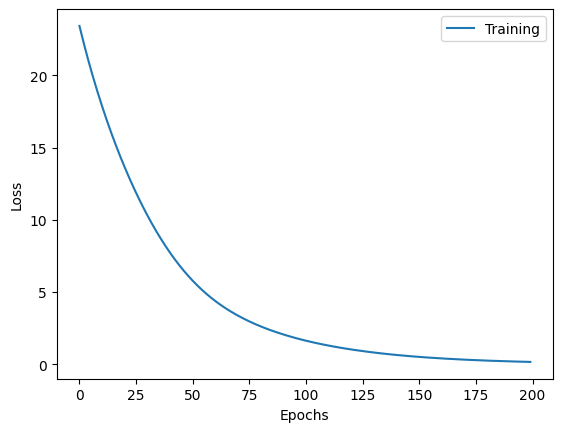

In [191]:
plt.plot(range(len(history['loss'])), history['loss'], label="Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='best')
# plt.title(label)

In [218]:
x_valid = np.array([5,6])

In [219]:
np.array(list(map(maping, x_valid))).sum()

73

In [216]:
x_valid = np.array(x_valid)
x_valid.shape

(1, 1, 2)

In [220]:
layer1 = model.layers[0]
layer2 = model.layers[1]

In [221]:
layer1.forward_propagation(x_valid)

In [222]:
layer2.forward_propagation(layer1.output)

In [223]:
layer2.output

array([72.97498892])

In [52]:
model.layers